In [9]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.xarray
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
%matplotlib inline

# <font color=blue>_Centre Calibration from Field Rastering at $\phi = 0^\circ$ and $\phi = 90^\circ$_</font>

In [2]:
x_start, x_end, x_step = 26.6, 27.5, 0.02
y_start, y_end, y_step = 22.1, 22.6, 0.02
x_pts = np.arange(x_start, x_end+x_step, x_step)
y_pts = np.arange(y_start, y_end+y_step, y_step)

Import data from csv

In [3]:
phi0 = pd.read_csv('./2019-06-03/fine_fieldRaster_2019-06-03_11.csv', comment='#')
phi90 = pd.read_csv('./2019-06-03/fine_fieldRaster_2019-06-03_10.csv', comment='#')

Text(0.5, 1.0, 'phi0 xy plane field')

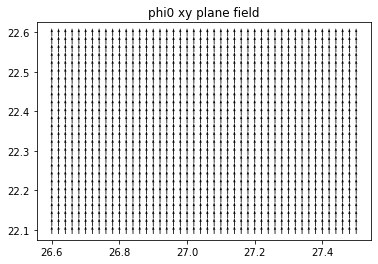

In [4]:
x = phi0['X']
y = phi0['Y']
z = [0]

x_field = phi0['Xfield_avg']
y_field = phi0['Yfield_avg']
z_field = phi0['Zfield_avg']

plt.quiver(x, y, x_field, y_field, pivot='middle', scale = 10)
plt.title('phi0 xy plane field')
#fig = plt.figure()
#ax = fig.add_subplot(111, projection ='3d')
#ax.quiver(x_pts, y_pts, z_pts, x_field, y_field, z_field, length = 0.9)

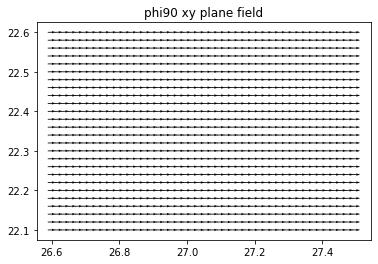

In [5]:
x = phi90['X']
y = phi90['Y']
z = [0]

x_field = phi90['Xfield_avg']
y_field = phi90['Yfield_avg']
z_field = phi90['Zfield_avg']
plt.title('phi90 xy plane field')
plt.quiver(x, y, x_field, y_field, pivot='middle', scale = 10)

In [6]:
#Data variables dict
phi0_data_vars = {}
phi90_data_vars = {}

#Add (dims, data) tuple for each variable column to dict
for var in phi0.columns[:]:
    dims = ["Xpos", "Ypos"]
    data0 = phi0[var].values.reshape(x_pts.size, y_pts.size)
    data90 = phi90[var].values.reshape(x_pts.size, y_pts.size)

    phi0_data_vars[var] = (dims, data0)
    phi90_data_vars[var] = (dims, data90)

coords = {"Xpos":('Xpos', x_pts), "Ypos":('Ypos', y_pts)}

phi0_ds = xr.Dataset(phi0_data_vars, coords)
phi90_ds = xr.Dataset(phi90_data_vars, coords)

In [7]:
phi0_ds.Yfield_avg.hvplot()

:Image   [Ypos,Xpos]   (Yfield_avg)

In [8]:
phi90_ds.Yfield_avg.hvplot()

:Image   [Ypos,Xpos]   (Yfield_avg)

In [9]:
phi90_ds.Xfield_avg.hvplot()

:Image   [Ypos,Xpos]   (Xfield_avg)

In [10]:
phi0_ds.Xfield_avg.hvplot()

:Image   [Ypos,Xpos]   (Xfield_avg)

In [11]:
phi0_ds.Zfield_avg.hvplot()

:Image   [Ypos,Xpos]   (Zfield_avg)

In [12]:
phi90_ds.Zfield_avg.hvplot()

:Image   [Ypos,Xpos]   (Zfield_avg)

In [13]:
combined_Z_field = (phi0_ds.Zfield_avg**2 + phi90_ds.Zfield_avg**2)

In [14]:
combined_Z_field.hvplot()

:Image   [Ypos,Xpos]   (Zfield_avg)

In [15]:
combined_Z_field.where(combined_Z_field == combined_Z_field.min(), drop=True)

<xarray.DataArray 'Zfield_avg' (Xpos: 1, Ypos: 1)>
array([[8.507219e-08]])
Coordinates:
  * Xpos     (Xpos) float64 27.14
  * Ypos     (Ypos) float64 22.32

In [27]:
combined_inplane = (phi0_ds.Yfield_avg**2 + phi90_ds.Xfield_avg**2)

In [28]:
combined_inplane.hvplot()

:Image   [Ypos,Xpos]   (value)

# We have two bright spots, with the second one closer to the min z position

In [21]:
combined_inplane.where(combined_inplane == combined_inplane.max(), drop=True)

<xarray.DataArray (Xpos: 1, Ypos: 1)>
array([[0.115755]])
Coordinates:
  * Xpos     (Xpos) float64 27.4
  * Ypos     (Ypos) float64 22.12

In [31]:
b = combined_inplane.where(combined_inplane < combined_inplane.max(), drop = True)
b.where(b == b.max(),drop=True)

<xarray.DataArray (Xpos: 1, Ypos: 1)>
array([[0.115752]])
Coordinates:
  * Xpos     (Xpos) float64 27.14
  * Ypos     (Ypos) float64 22.42

# Centres
z field (27.14, 22.32), y field (27.14, 22.42) avg (27.14, 22.47)

In [33]:
zfield_x, zfield_y = 27.14, 22.32
yfield_x, yfield_y = 27.14, 22.47

In [22]:
phi0_phi = np.arctan2(phi0_ds.Xfield_avg, phi0_ds.Yfield_avg)
phi90_phi = np.arctan2(phi90_ds.Yfield_avg, phi90_ds.Xfield_avg)
theta0_phi = np.arctan2(np.sqrt(phi0_ds.Xfield_avg**2 + phi0_ds.Yfield_avg**2), phi0_ds.Zfield_avg)
theta90_phi = np.arctan2(np.sqrt(phi90_ds.Xfield_avg**2 + phi90_ds.Yfield_avg**2), phi90_ds.Zfield_avg)

In [37]:
print('phi0 : phi = %1.2f' % (phi0_phi.sel(Xpos=zfield_x, Ypos=zfield_y, method='backfill').values*180/np.pi))
print('phi90 : phi = %1.2f' % (phi90_phi.sel(Xpos=zfield_x, Ypos=zfield_y, method='backfill').values*180/np.pi))
print('phi0 : theta = %1.2f' % (theta0_phi.sel(Xpos=zfield_x, Ypos=zfield_y, method='backfill').values*180/np.pi))
print('phi90 : theta = %1.2f' % (theta90_phi.sel(Xpos=zfield_x, Ypos=zfield_y, method='backfill').values*180/np.pi))

phi0 : phi = -0.90
phi90 : phi = 0.93
phi0 : theta = 89.87
phi90 : theta = 87.16


In [38]:
print('phi0 : phi = %1.2f' % (phi0_phi.sel(Xpos=yfield_x, Ypos=yfield_y, method='backfill').values*180/np.pi))
print('phi90 : phi = %1.2f' % (phi90_phi.sel(Xpos=yfield_x, Ypos=yfield_y, method='backfill').values*180/np.pi))
print('phi0 : theta = %1.2f' % (theta0_phi.sel(Xpos=yfield_x, Ypos=yfield_y, method='backfill').values*180/np.pi))
print('phi90 : theta = %1.2f' % (theta90_phi.sel(Xpos=yfield_x, Ypos=yfield_y, method='backfill').values*180/np.pi))

phi0 : phi = -0.89
phi90 : phi = 0.87
phi0 : theta = 89.85
phi90 : theta = 88.21
